In [1]:
# RAG Embedding 1
import tiktoken 

In [2]:
encoding = tiktoken.encoding_for_model("gpt-4o-mini")
encoding

<Encoding 'o200k_base'>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'E:\open_ai_class\RAG_Embedding1-bbc_text_cls(DataSet).csv')

In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
df_small = df.sample(100)

In [7]:
df_small.head()

,text,labels
1256,Budget to set scene for election\n\nGordon Bro...,politics
1005,UK heading wrong way - Howard\n\nTony Blair ha...,politics
1065,Hospital suspends 'no Welsh' plan\n\nAn Englis...,politics
74,EU ministers to mull jet fuel tax\n\nEuropean ...,business
2009,China 'blocks Google news site'\n\nChina has b...,tech


<Axes: >

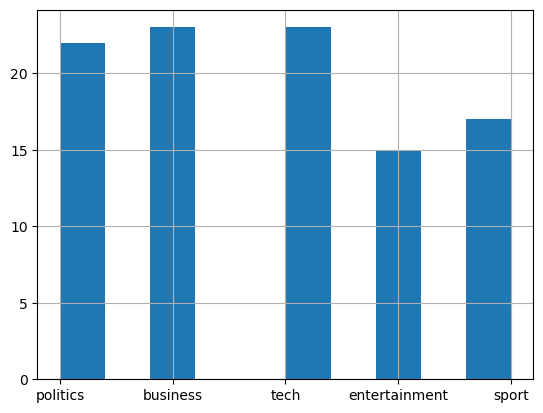

In [8]:
df_small['labels'].hist()

In [9]:
from openai import OpenAI

In [10]:
client = OpenAI()

In [11]:
text = df_small['text'].iloc[0]
text

'Budget to set scene for election\n\nGordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n\nTreasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare.\n\n- Increase in the stamp duty threshold from £60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much greater chanc

In [12]:
text = text.replace("\n"," ")

In [13]:
emb = client.embeddings.create(
    input=[text],
    model='text-embedding-3-small'
)
emb

CreateEmbeddingResponse(data=[Embedding(embedding=[0.011555873788893223, 0.009329795837402344, 0.0889444649219513, -0.014404760673642159, 0.0020981249399483204, -0.003450112883001566, 0.024838345125317574, 0.07986748963594437, -0.029080843552947044, -0.01807994768023491, 0.03144874796271324, -0.011765532195568085, -0.020447853952646255, -0.005571361631155014, 0.057421717792749405, -0.005315455142408609, -0.01604502834379673, 0.011185888200998306, 0.002395654795691371, 0.013800451532006264, 0.0014475674834102392, 0.006641236133873463, -0.03095543570816517, -0.03112809546291828, 0.03571591153740883, -0.028562864288687706, 0.02353106439113617, -0.07049453258514404, 0.005753271281719208, 0.0218167994171381, 0.020139532163739204, -0.024197038263082504, 0.000914942764211446, 0.009095471352338791, -0.009459290653467178, -0.007584698498249054, -0.02504800446331501, 0.01611902564764023, 0.0370478592813015, -0.05658308416604996, -0.026836266741156578, -0.03702319413423538, 0.003373032668605447, 

In [14]:
emb.data[0]

Embedding(embedding=[0.011555873788893223, 0.009329795837402344, 0.0889444649219513, -0.014404760673642159, 0.0020981249399483204, -0.003450112883001566, 0.024838345125317574, 0.07986748963594437, -0.029080843552947044, -0.01807994768023491, 0.03144874796271324, -0.011765532195568085, -0.020447853952646255, -0.005571361631155014, 0.057421717792749405, -0.005315455142408609, -0.01604502834379673, 0.011185888200998306, 0.002395654795691371, 0.013800451532006264, 0.0014475674834102392, 0.006641236133873463, -0.03095543570816517, -0.03112809546291828, 0.03571591153740883, -0.028562864288687706, 0.02353106439113617, -0.07049453258514404, 0.005753271281719208, 0.0218167994171381, 0.020139532163739204, -0.024197038263082504, 0.000914942764211446, 0.009095471352338791, -0.009459290653467178, -0.007584698498249054, -0.02504800446331501, 0.01611902564764023, 0.0370478592813015, -0.05658308416604996, -0.026836266741156578, -0.03702319413423538, 0.003373032668605447, -0.023740721866488457, -0.0034

In [15]:
emb.data[0].embedding

[0.011555873788893223,
 0.009329795837402344,
 0.0889444649219513,
 -0.014404760673642159,
 0.0020981249399483204,
 -0.003450112883001566,
 0.024838345125317574,
 0.07986748963594437,
 -0.029080843552947044,
 -0.01807994768023491,
 0.03144874796271324,
 -0.011765532195568085,
 -0.020447853952646255,
 -0.005571361631155014,
 0.057421717792749405,
 -0.005315455142408609,
 -0.01604502834379673,
 0.011185888200998306,
 0.002395654795691371,
 0.013800451532006264,
 0.0014475674834102392,
 0.006641236133873463,
 -0.03095543570816517,
 -0.03112809546291828,
 0.03571591153740883,
 -0.028562864288687706,
 0.02353106439113617,
 -0.07049453258514404,
 0.005753271281719208,
 0.0218167994171381,
 0.020139532163739204,
 -0.024197038263082504,
 0.000914942764211446,
 0.009095471352338791,
 -0.009459290653467178,
 -0.007584698498249054,
 -0.02504800446331501,
 0.01611902564764023,
 0.0370478592813015,
 -0.05658308416604996,
 -0.026836266741156578,
 -0.03702319413423538,
 0.003373032668605447,
 -0.0237

In [16]:
type(emb.data[0].embedding)

list

In [17]:
# RAG Embedding 2
embs = client.embeddings.create(
    input=["I like cats", "I like eggs"],
    model='text-embedding-3-small'
)

In [18]:
len(embs.data)

2

In [19]:
import numpy as np

In [20]:
e3 = np.array(embs.data[0].embedding)
e4 = np.array(embs.data[1].embedding)
np.abs(e3-e4).sum()

29.84109266183185

In [21]:
np.linalg.norm(e3)

0.9999999315771769

In [22]:
# why do we care? when the norms of x and y are 1,
# cosine distance is the rather equivalent as L2 distance!
np.linalg.norm(e4)

1.0000000803192894

In [23]:
model_name = 'text-embedding-3-small'

In [24]:
def get_embedding(text):
    text = text.replace("\n", " ")
    emb = client.embeddings.create(
        input=[text],
        model=model_name,
    )
    return emb.data[0].embedding

In [25]:
df_small['embeddings'] = df_small['text'].apply(get_embedding)

In [26]:
df_small.head()

,text,labels,embeddings
1256,Budget to set scene for election\n\nGordon Bro...,politics,"[0.011555873788893223, 0.009329795837402344, 0..."
1005,UK heading wrong way - Howard\n\nTony Blair ha...,politics,"[-0.03301011398434639, 0.02568286843597889, 0...."
1065,Hospital suspends 'no Welsh' plan\n\nAn Englis...,politics,"[-0.03571007028222084, 0.03919524699449539, 0...."
74,EU ministers to mull jet fuel tax\n\nEuropean ...,business,"[-0.04933224618434906, 0.006009937729686499, 0..."
2009,China 'blocks Google news site'\n\nChina has b...,tech,"[-0.0013206556905061007, 0.01003211084753275, ..."


In [27]:
# RAG Embedding 3
import faiss

In [28]:
dims = len(embs.data[0].embedding)
dims

1536

In [29]:
index = faiss.IndexFlatL2(dims)


In [30]:
vectors = df_small['embeddings'].tolist()
vectors

[[0.011555873788893223,
  0.009329795837402344,
  0.0889444649219513,
  -0.014404760673642159,
  0.0020981249399483204,
  -0.003450112883001566,
  0.024838345125317574,
  0.07986748963594437,
  -0.029080843552947044,
  -0.01807994768023491,
  0.03144874796271324,
  -0.011765532195568085,
  -0.020447853952646255,
  -0.005571361631155014,
  0.057421717792749405,
  -0.005315455142408609,
  -0.01604502834379673,
  0.011185888200998306,
  0.002395654795691371,
  0.013800451532006264,
  0.0014475674834102392,
  0.006641236133873463,
  -0.03095543570816517,
  -0.03112809546291828,
  0.03571591153740883,
  -0.028562864288687706,
  0.02353106439113617,
  -0.07049453258514404,
  0.005753271281719208,
  0.0218167994171381,
  0.020139532163739204,
  -0.024197038263082504,
  0.000914942764211446,
  0.009095471352338791,
  -0.009459290653467178,
  -0.007584698498249054,
  -0.02504800446331501,
  0.01611902564764023,
  0.0370478592813015,
  -0.05658308416604996,
  -0.026836266741156578,
  -0.03702319

In [31]:
vectors = np.array(vectors) # N x D


In [32]:
index.add(vectors)

In [33]:
print(df_small['text'].sample(random_state=1).iloc[0])

Gadget market 'to grow in 2005'

The explosion in consumer technology is to continue into 2005, delegates at the world's largest gadget show, in Las Vegas, have been told.

The number of gadgets in the shops is predicted to grow by 11%, while devices which talk to each other will become increasingly important. "Everything is going digital," Kirsten Pfeifer from the Consumer Electronics Association, told the BBC News website. The Consumer Electronics Show (CES) featured the pick of 2005's products. "Consumers are controlling what they want and technologies like HDTVs [high-definition TVs], digital radio, and digital cameras will remain strong in 2005. "All the products on show really showed the breadth and depth of the industry." Despite showing diversity, some delegates attending complained that the showcase lacked as much "wow factor" as in previous years.

The portable technologies on show also reflected one of the buzzwords of CES, which was the "time and place shifting" of multimed

In [34]:
query = """what percentage is the number of gadgets expected to grow by?"""

In [35]:
query_emb = get_embedding(query)

In [1]:
# kernel stops from here due to running ut of memmory!
query_emb = np.array(query_emb).reshape(1, -1)

NameError: name 'np' is not defined